In [ ]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.

# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

# Масштабируйте данные с помощью StandardScaler.

# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

# Постройте диаграмму рассеяния на этих данных.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
X = pd.DataFrame(datasets.load_boston().data, columns= datasets.load_boston().feature_names)
y = datasets.load_boston().target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X.columns)

In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [31]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

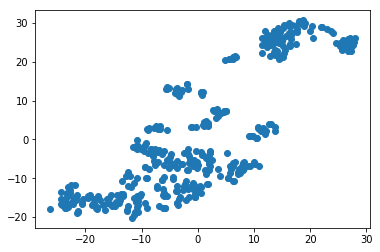

In [34]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1]);

In [33]:
# Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.

# Вычислите средние значения price и CRIM в разных кластерах.

In [36]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters = 3, max_iter=100, random_state=42)

In [43]:
cluster_labels = kmeans.fit_predict(X_train_scaled)
pd.value_counts(cluster_labels)

2    190
1    128
0     86
dtype: int64

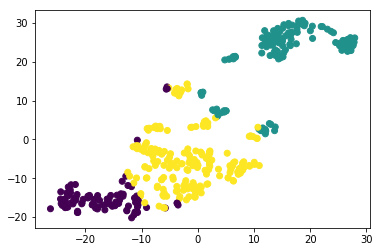

In [44]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = cluster_labels);

In [67]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [68]:
X_train = pd.DataFrame(data = X_train, columns=X.columns)
X_train['cluster_labels'] = cluster_labels
X_train['price'] = y_train
X_train.groupby(['cluster_labels'])[['price','CRIM']].mean()

,price,CRIM
cluster_labels,,
0,27.788372,-0.398864
1,16.179688,0.801674
2,24.994737,-0.359537
